# Bengaluru House Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("Bengaluru House Price (semi-cleaned).csv")
df1.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees)
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2,51.00


In [4]:
df1.shape

(13303, 6)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8789
Name: area_type, dtype: int64

In [6]:
df1.isnull().sum()

area_type                0
location                 0
size                     0
total_sqft               0
bathrooms                0
price(in lakh rupees)    0
dtype: int64

In [7]:
df1[['bathrooms']]

,bathrooms
0,2
1,5
2,2
3,3
4,2
...,...
13298,4
13299,5
13300,2
13301,4


In [8]:
df1[df1['bathrooms'] == 0].shape

(57, 6)

In [9]:
df1['bathrooms'] = df1['bathrooms'].replace(0,1)

In [10]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df1.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2,51.00,2


In [13]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df1[df1['bhk'] > 20]

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk
1716,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27,230.0,27
4678,Plot Area,Munnekollal,43 Bedroom,2400,40,660.0,43


In [15]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,1,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,1,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,1,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2,63.770,2


In [18]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(sqft_to_num)

In [20]:
df2.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2,51.00,2


In [21]:
df3 = df2.copy()

In [22]:
df3.location = df3.location.apply(lambda x: x.strip())
loc_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [23]:
len(df3.location.unique())

1293

In [24]:
len(loc_stats[loc_stats<=10])

1052

In [25]:
loc_l10 = loc_stats[loc_stats <=10]
loc_l10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
df3.location = df3.location.apply(lambda x: 'other' if x in loc_l10 else x)
df3.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13298                  Whitefield
13299                       other
13300       Raja Rajeshwari Nagar
13301             Padmanabhanagar
13302                Doddathoguru
Name: location, Length: 13303, dtype: object

In [27]:
df4 = df3.copy()

In [28]:
df4['price_per_sqft'] = df4['price(in lakh rupees)']*100000/df4['total_sqft']
df4.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [29]:
df4[df4['total_sqft']/df4['bhk'] < 300.0].head()
df4.shape

(13303, 8)

In [30]:
df5 = df4[~(df4['total_sqft']/df4['bhk'] < 300.0)]
df5.shape

(12559, 8)

In [31]:
df5.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [32]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def removing_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [34]:
df6 = removing_pps_outliers(df5)
df6.shape

(10286, 8)

In [35]:
def removing_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'sd': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
df7 = removing_bhk_outliers(df6)
df7.shape

(7353, 8)

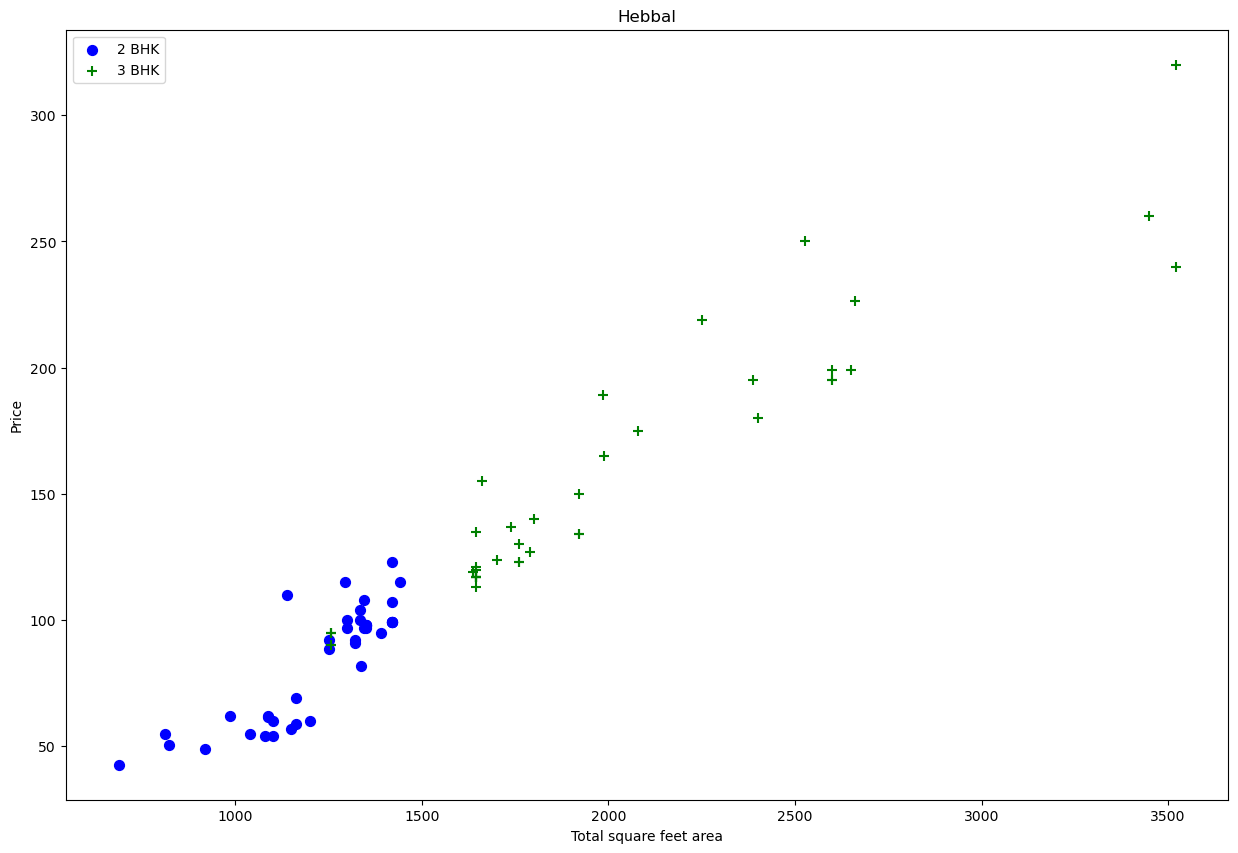

In [36]:
def plot_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2['price(in lakh rupees)'], color = 'b', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3['price(in lakh rupees)'], marker = '+', color = 'g', label = '3 BHK', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_chart(df7, "Hebbal")

Text(0, 0.5, 'count')

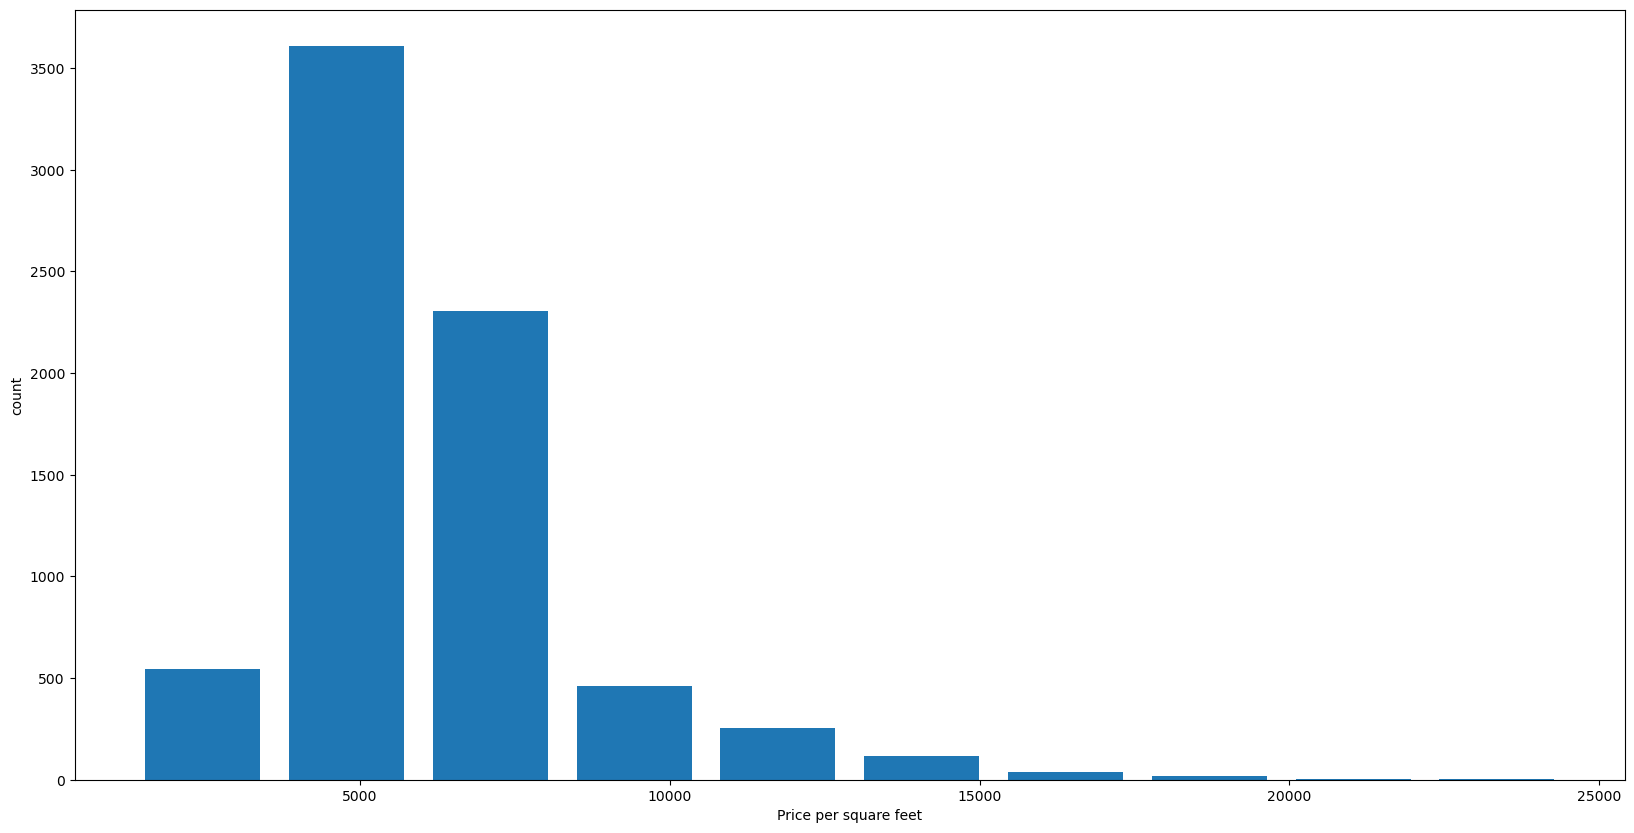

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel('count')

In [45]:
df7.bathrooms.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

In [46]:
df7[df7.bathrooms>10]

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12,160.0,10,4000.000000
8530,Super built-up Area,other,10 BHK,12000.0,12,525.0,10,4375.000000
8619,Super built-up Area,other,16 BHK,10000.0,16,550.0,16,5500.000000
9352,Super built-up Area,other,11 BHK,6000.0,12,150.0,11,2500.000000
9683,Super built-up Area,other,13 BHK,5425.0,13,275.0,13,5069.124424


In [37]:
df8 = df7[df7.bathrooms<df7.bhk +2]
df8.head()

,area_type,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2,148.0,2,11983.805668


In [38]:
df8.shape

(7275, 8)

In [47]:
df8.drop(columns = 'area_type')

,location,size,total_sqft,bathrooms,price(in lakh rupees),bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10277,other,2 BHK,1200.0,2,70.0,2,5833.333333
10278,other,1 BHK,1800.0,1,200.0,1,11111.111111
10281,other,2 BHK,1353.0,2,110.0,2,8130.081301
10282,other,1 Bedroom,812.0,1,26.0,1,3201.970443


Text(0, 0.5, 'Count')

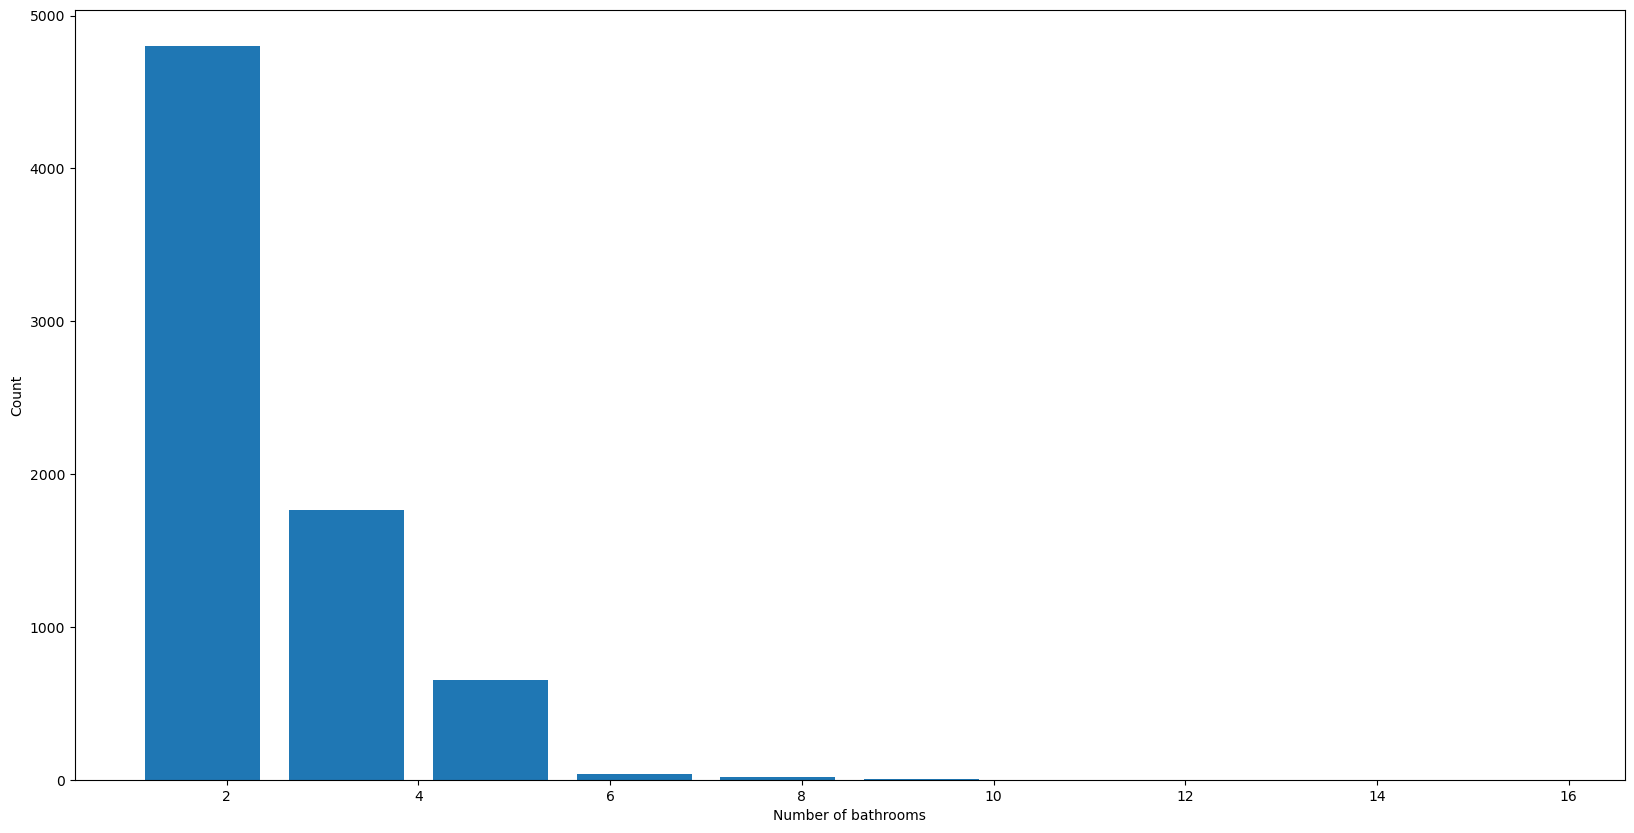

In [48]:
plt.hist(df8.bathrooms,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
df9 = df8.drop(columns = ['size','price_per_sqft','area_type'])
df9.head()

,location,total_sqft,bathrooms,price(in lakh rupees),bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


In [54]:
df9.shape

(7275, 5)

In [65]:
dummies = pd.get_dummies(df9.location)
dummies = dummies.astype(int)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df10 = pd.concat([df9,dummies.drop(columns = 'other')],axis = 'columns')
df10.head()

,location,total_sqft,bathrooms,price(in lakh rupees),bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df11 = df10.drop(columns = 'location')
df11.shape

(7275, 245)

In [69]:
X = df11.drop('price(in lakh rupees)', axis = 'columns')

In [70]:
X.head()

,total_sqft,bathrooms,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y = df11['price(in lakh rupees)']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price(in lakh rupees), dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [91]:
from sklearn.linear_model import LinearRegression
models = LinearRegression()
models.fit(x_train,y_train)
print(f"Linear Regression Accuracy is: {models.score(x_test,y_test)*100}")

Linear Regression Accuracy is: 83.03865494737191


In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80719378, 0.77294445, 0.86466222, 0.83533362, 0.8181045 ])

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [88]:
def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)

C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\User

,model,best_score,best_params
0,linear_regression,0.819836,{'fit_intercept': False}
1,lasso,0.680017,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.730238,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [92]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1
    return models.predict([x])[0]

# Prediction

In [98]:
predict_price('Indira Nagar',1000,3,3)

C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


189.39384920535045

In [104]:
predict_price('1st Block Jayanagar',3000,4,4)

C:\Users\Ansh Choudhary\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


367.289345082752